In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math
from matplotlib.pyplot import rcParams
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2024-01-15 13:02:06.075683: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-15 13:02:06.122197: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-15 13:02:08.070165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-01-15 13:02:12.470519: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 227 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:3b:00.0, compute capability: 7.5
2024

In [2]:
def convertdatabacktodataframe (RH,Rainfall,Tx,Tn,WindSpeed,WindDirecton):
    mydata = {'RelativeHumidity':RH,'Rainfall':Rainfall,'MaxmTemp':Tx,'MinTemp':Tn,'WindSpeed':
              WindSpeed,'WindDirection':WindDirecton}
    df2 = pd.DataFrame(mydata)
    return df2 
# Function for removing duplicates
def removeDuplicates(x):
    mylist = list( dict.fromkeys(x) )
    cleanedList = [x for x in mylist if str(x) != 'nan']
    return cleanedList 

idd3 = [ ]
def calculateidd3(x1, x2):
    idd3.clear()
    for x in range(x1, x2):
        idd3.append(x)
    return idd3
def convertdatabacktodataframe2 (RH,Rainfall,Tx,Tn,WindSpeed,WindDirecton):
    mydata = dict(RelativeHumidity=RH,Rainfall =Rainfall,MaxmTemp =Tx,MinTemp =Tn,WindSpeed=WindSpeed,WindDirection=WindDirecton)
    mydata2 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in mydata.items() ]))
    return mydata2,mydata
def emergelists (nested_list):
    rainfalldatap = []
    for sublist in nested_list:
        for item in sublist:
            rainfalldatap.append(item)
    return rainfalldatap 
dayz = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
def StationDataRainfall(station,idd,dayz):
    rainfalldata = []
    for i in range(len(idd)):
        rainfalldata1 = CleanList(list(station.loc[idd[i],dayz]))
        rainfalldata.append(rainfalldata1)   
    return emergelists(rainfalldata) 

def stationGraph (x,StationDataRainfall):
    plt.xlabel('Days') 
    # naming the y axis 
    plt.ylabel('Rainfall Amount (MM)') 
    # giving a title to my graph 
    plt.title('Entebbe Rainfall') 
    plt.plot(x,StationDataRainfall , label = "Entebbe") 
    # show a legend on the plot 
    plt.legend() 
    #plt.savefig('D:\WeatherProject\ResearchGraph/ent_jan19911996.png')
    # function to show the plot 
    plt.show()   

def Rainfallclasses (RainfallData):
    RainfallClass = []
    for i in range (len(RainfallData)): 
        if (RainfallData[i] == 0 or RainfallData[i] =='nan'):
            RainfallClass.append(0)
        else:
            RainfallClass.append(1)
    return RainfallClass

# Getting the datasets with dates - 1.0 => Id, Year,Month

dayzz = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
def StationDataRainfall2(station,idd,dayzz):
    rainfalldata = []
    for i in range(len(idd)):
        rainfalldata1 = CleanList(list(station.loc[idd[i],dayzz]))
        rainfalldata.append(rainfalldata1)   
    return emergelists(rainfalldata) 

def CleanList(original_list):
    cleaned_list = [value for value in original_list if value != 'NaN' or value != 'nan' ]
    return cleaned_list

def NormaliseDatasets(weather_df):
    # Separate the target variable (Rainfall) and features
    target_column ='Rainfall'
    #features = weather_df.drop(target_column, axis=1)
    features = weather_df
    # Impute missing values using SimpleImputer (replace NaN with the mean in this example)
    imputer = SimpleImputer(strategy='constant')
    imputed_features = imputer.fit_transform(features)
    # Normalize the features using Min-Max scaling
    scaler = MinMaxScaler()
    #scaler = StandardScaler()
    normalized_features = scaler.fit_transform(features)
    # Create a new DataFrame with normalized features
    normalized_weather_df = pd.DataFrame(normalized_features, columns=features.columns)
    # Add the target variable back to the DataFrame
    #normalized_weather_df[target_column] = weather_df[target_column]
    # Display the normalized data
    return normalized_weather_df
# Determining the seasons
def seasons(threshold,probabilityscores):
    Rainfallseason = []
    for i in range (len(probabilityscores)): 
        if (probabilityscores[i] > threshold):
            Rainfallseason.append("Onset")
        else:
             Rainfallseason.append("cessation")
    return Rainfallseason

xls = pd.ExcelFile('ResearchData1/RainfallData37.xlsx')

xls2 = pd.ExcelFile('ResearchData1/RH5.xlsx')

xls3 = pd.ExcelFile('ResearchData1/Temperature9.xlsx') 

xls4 = pd.ExcelFile('ResearchData1/Windforce3.xlsx') 

xls5 = pd.ExcelFile('ResearchData1/Wind_dd3.xlsx')

# Now you can list all sheets in the file
#xls.sheet_names
#xls2.sheet_names
xls5.sheet_names

['Entebbe', 'Kampala', 'Namulonge', 'Masindi']

In [3]:
# to read all sheets to a map
sheet_to_df_map = {}
for sheet_name in xls.sheet_names:
    sheet_to_df_map[sheet_name] = xls.parse(sheet_name)
    # you can also use sheet_index [0,1,2..] instead of sheet name.

sheet_to_df_map2 = {}
for sheet_name in xls2.sheet_names:
    sheet_to_df_map2[sheet_name] = xls2.parse(sheet_name)
    # you can also use sheet_index [0,1,2..] instead of sheet name.

sheet_to_df_map3 = {}
for sheet_name in xls3.sheet_names:
    sheet_to_df_map3[sheet_name] = xls3.parse(sheet_name)
    # you can also use sheet_index [0,1,2..] instead of sheet name.
    
sheet_to_df_map4 = {}
for sheet_name in xls4.sheet_names:
    sheet_to_df_map4[sheet_name] = xls4.parse(sheet_name)
    # you can also use sheet_index [0,1,2..] instead of sheet name.

sheet_to_df_map5 = {}
for sheet_name in xls5.sheet_names:
    sheet_to_df_map5[sheet_name] = xls5.parse(sheet_name)
    # you can also use sheet_index [0,1,2..] instead of sheet name.

In [4]:
# Wind Direction 
entebbeWd = pd.DataFrame(sheet_to_df_map5['Entebbe'].values)

kampalaWd = pd.DataFrame(sheet_to_df_map5['Kampala'].values)

masindiWd = pd.DataFrame(sheet_to_df_map5['Masindi'].values)

namulongeWd = pd.DataFrame(sheet_to_df_map5['Namulonge'].values)

# Wind force 
entebbeFc = pd.DataFrame(sheet_to_df_map4['Entebbe'].values)

kampalaFC = pd.DataFrame(sheet_to_df_map4['Kampala'].values)

masindiFC = pd.DataFrame(sheet_to_df_map4['Masindi'].values)

# Maximum and Minimum Temperature 

entebbeTx = pd.DataFrame(sheet_to_df_map3['EntebbeTx'].values)
entebbeTn = pd.DataFrame(sheet_to_df_map3['EntebbeTn'].values)

kampalaTx = pd.DataFrame(sheet_to_df_map3['KampalaTx'].values)
kampalaTn = pd.DataFrame(sheet_to_df_map3['KampalaTn'].values)  

kawandaTx = pd.DataFrame(sheet_to_df_map3['KawandaTx'].values)
kawandaTn = pd.DataFrame(sheet_to_df_map3['KawandaTn'].values) 

namulongeTx = pd.DataFrame(sheet_to_df_map3['NamulongeTx'].values)
namulongeTn = pd.DataFrame(sheet_to_df_map3['NamulongeTn'].values) 

masindiTx = pd.DataFrame(sheet_to_df_map3['MasindiTx'].values)
masindiTn = pd.DataFrame(sheet_to_df_map3['MasindiTn'].values) 

# Relative Humidity 

entebbeRH = pd.DataFrame(sheet_to_df_map2['Entebbe'].values)
masindiRH = pd.DataFrame(sheet_to_df_map2['Masindi'].values)
kampalaRH = pd.DataFrame(sheet_to_df_map2['Kampala'].values)
kawandaRH = pd.DataFrame(sheet_to_df_map2['Kawanda'].values)
namulongeRH = pd.DataFrame(sheet_to_df_map2['Namulonge'].values)

years = removeDuplicates(sheet_to_df_map['Entebbe']['Year'].values)
months = removeDuplicates(sheet_to_df_map['Entebbe']['Months'].values)

# Prints all the sheets name in an ordered dictionary
#print(df.keys()) Rainfall Data
entebbe = pd.DataFrame(sheet_to_df_map['Entebbe'].values)
masindi = pd.DataFrame(sheet_to_df_map['Masindi'].values)
kampala = pd.DataFrame(sheet_to_df_map['Kampala'].values)
kawanda = pd.DataFrame(sheet_to_df_map['Kawanda'].values)
namulonge = pd.DataFrame(sheet_to_df_map['Namulonge'].values)

years = removeDuplicates(sheet_to_df_map['Entebbe']['Year'].values)
months = removeDuplicates(sheet_to_df_map['Entebbe']['Months'].values)
##First = sheet_to_df_map['Entebbe'][1].values
years = removeDuplicates(sheet_to_df_map['Masindi']['Year'].values)
months = removeDuplicates(sheet_to_df_map['Masindi']['Months'].values)

In [5]:
# Entebbe Weather station
# Wind Direction  13392 
idd = calculateidd3(0,160)
EntebbeWd = StationDataRainfall(entebbeWd,idd,dayz)
F1d = calculateidd3(0,13392)
#stationGraph (F1d,EntebbeWd)

# wind speed / Force entebbeFc 16368
idd = calculateidd3(0,514)
EntebbeFC = StationDataRainfall(entebbeFc,idd,dayz)
F1 = calculateidd3(0,16368)
#stationGraph (F1,EntebbeFC)

# Temperature Maxm 9548 
idd = calculateidd3(0,217)
EntebbeTx = StationDataRainfall(entebbeTx,idd,dayz)
T1 = calculateidd3(0,9548)
#stationGraph (T1,EntebbeTx)

iddTn = calculateidd3(0,326)
EntebbeTn = StationDataRainfall(entebbeTn,iddTn,dayz)
T1n = calculateidd3(0,10757)
#stationGraph (T1n,EntebbeTn)

# Rainfall 
idd = calculateidd3(0,384)
Entebberainfall = StationDataRainfall(entebbe,idd,dayz)
x1 = calculateidd3(0,12865)
#stationGraph (x1,Entebberainfall)

# Relative Humidity 9734
iddd = calculateidd3(0,288)
EntebbeRH = StationDataRainfall(entebbeRH,iddd,dayz)
xx1 = calculateidd3(0,9734)

Entebbedata = convertdatabacktodataframe2(EntebbeRH,Entebberainfall,EntebbeTx,EntebbeTn,EntebbeFC,EntebbeWd)
Entebbedictionary = Entebbedata[1]
Entebbedictionary2 = Entebbedata[0]
Entebbedictionary2.replace('__', pd.NA, inplace=True)
Entebbedictionary2 = Entebbedictionary2.dropna() 

Rainfall =Entebbedictionary['Rainfall']
# Add creating rainfall classes 
EntebbeRainfallclasses = Rainfallclasses(Rainfall)
#Entebbedata

# Normalised data
EntebbeNormalisedData = NormaliseDatasets(Entebbedictionary2)
#EntebbeNormalisedData = EntebbeNormalisedData.drop(Entebberainfall, axis=1)
# Add the target variable back to the DataFrame
#EntebbeNormalisedData[EntebbeRainfallclasses] = EntebbeNormalisedData[EntebbeRainfallclasses]
#EntebbeNormalisedData
Rainfall = EntebbeNormalisedData['Rainfall']
EntebbeRainfallclasses = Rainfallclasses(Rainfall)
Xe = EntebbeNormalisedData.drop('Rainfall', axis=1)
#Y= EntebbeRainfallclasses
Ye= EntebbeRainfallclasses
Xe.shape

(4497, 5)

In [6]:
# Kampala Weather Station 12834

# Wind Direction  9114
idd2 = calculateidd3(0,288)
KampalaWd = StationDataRainfall(kampalaWd,idd2,dayz)
Fkwd = calculateidd3(0,9114)  
#stationGraph (Fkwd,KampalaWd) 

# Windforceidd2 = calculateidd3(0,414) KampalaFC 4216
idd2 = calculateidd3(0,128)
KampalaFC = StationDataRainfall(kampalaFC,idd2,dayz)
Fx3 = calculateidd3(0,4216)  
#stationGraph (Fx3,KampalaFC) 

idd2 = calculateidd3(0,383)
Kampalarainfall = StationDataRainfall(kampala,idd,dayz)
len(Kampalarainfall)
x3 = calculateidd3(0,12834)  
#stationGraph (x2,Kampalarainfall)

# Relative Humidity 21545
iddd = calculateidd3(0,698)
KampalaRH = StationDataRainfall(kampalaRH,iddd,dayz)
xx1 = calculateidd3(0,23529)
#stationGraph (xx1,KampalaRH)

# Temperature Maximum 12028
iddd = calculateidd3(0,350)
KampalaTX = StationDataRainfall(kampalaTx,iddd,dayz)
Kxx1 = calculateidd3(0,12028)
#stationGraph (Kxx1,KampalaTX)

# Temperature Minimum 7595
iddd = calculateidd3(0,219)
KampalaTn = StationDataRainfall(kampalaTn,iddd,dayz)
Kxx2 = calculateidd3(0,7595)
#stationGraph (Kxx2,KampalaTn)
Kampaladata = convertdatabacktodataframe2(KampalaRH,Kampalarainfall,KampalaTX,KampalaTn,KampalaFC,KampalaWd)
#Kampaladata

Kampaladictionary = Kampaladata[1]
Kampaladictionary2 = Kampaladata[0]
Kampaladictionary2.replace('__', pd.NA, inplace=True)
Kampaladictionary2 = Kampaladictionary2.dropna() 

Rainfall =Kampaladictionary['Rainfall']
# Add creating rainfall classes 
KampalaRainfallclasses = Rainfallclasses(Rainfall)
#Entebbedata

# Normalised data
KampalaNormalisedData = NormaliseDatasets(Kampaladictionary2)
#EntebbeNormalisedData = EntebbeNormalisedData.drop(Entebberainfall, axis=1)
# Add the target variable back to the DataFrame
#EntebbeNormalisedData[EntebbeRainfallclasses] = EntebbeNormalisedData[EntebbeRainfallclasses]
#EntebbeNormalisedData
Rainfall = KampalaNormalisedData['Rainfall']
KampalaRainfallclasses = Rainfallclasses(Rainfall)
Xk = KampalaNormalisedData.drop('Rainfall', axis=1)
#Y= EntebbeRainfallclasses
Yk= KampalaRainfallclasses
Xe.shape

(4497, 5)

In [7]:
# Masindi Weather Station 12710
# Wind Direction
idd2 = calculateidd3(0,414)
MasindiWd = StationDataRainfall(masindiWd,idd,dayz)
Fcwd = calculateidd3(0,12834) 
#stationGraph (Fcwd,MasindiWd)

# Wind speeed
idd2 = calculateidd3(0,306)
MasindiFC = StationDataRainfall(masindiFC,idd,dayz)
Fcx2 = calculateidd3(0,10261) 
#stationGraph (Fcx2,MasindiFC)

# Rainfall 
idd2 = calculateidd3(0,308)
Masindirainfall = StationDataRainfall(masindi,idd,dayz)
x2 = calculateidd3(0,12710) 
#stationGraph (x2,Masindirainfall)

# Relative Humidity 21545
iddd = calculateidd3(0,604)
MasindiRH = StationDataRainfall(masindiRH,iddd,dayz)
xx1 = calculateidd3(0,21545)
#stationGraph (xx1,MasindiRH)

# Temperature Maximum 12028
iddd = calculateidd3(0,279)
MasindiTX = StationDataRainfall(masindiTx,iddd,dayz)
Mxx1 = calculateidd3(0,9424)
#stationGraph (Mxx1,MasindiTX)

# Temperature Minimum 10912
iddd = calculateidd3(0,309)
MasindiTn = StationDataRainfall(masindiTn,iddd,dayz)
Mxx2 = calculateidd3(0,10912)
#stationGraph (Mxx2,MasindiTn)

Masindidata = convertdatabacktodataframe2(MasindiRH,Masindirainfall,MasindiTX,MasindiTn,MasindiFC,MasindiWd)
Masindidictionary = Masindidata[1]
Masindidictionary2 = Masindidata[0]
Masindidictionary2.replace('__', pd.NA, inplace=True)
Masindidictionary2 = Masindidictionary2.dropna() 

Rainfall =Masindidictionary['Rainfall']
# Add creating rainfall classes 
MasindiRainfallclasses = Rainfallclasses(Rainfall)
#Entebbedata

# Normalised data
MasindiNormalisedData = NormaliseDatasets(Kampaladictionary2)
#EntebbeNormalisedData = EntebbeNormalisedData.drop(Entebberainfall, axis=1)
# Add the target variable back to the DataFrame
#EntebbeNormalisedData[EntebbeRainfallclasses] = EntebbeNormalisedData[EntebbeRainfallclasses]
#EntebbeNormalisedData
Rainfall = MasindiNormalisedData['Rainfall']
MasindiRainfallclasses = Rainfallclasses(Rainfall)
Xm = MasindiNormalisedData.drop('Rainfall', axis=1)
#Y= EntebbeRainfallclasses
Ym= MasindiRainfallclasses
Xm.shape
combined_data = pd.concat([Masindidata[0],Kampaladata[0],Entebbedata[0]],axis=0)
combined_data

,RelativeHumidity,Rainfall,MaxmTemp,MinTemp,WindSpeed,WindDirection
0,81,0.9,26.6,17.4,2.0,250.0
1,91,0.0,25.2,17.0,2.0,220.0
2,80,0.0,27.7,16.3,3.0,180.0
3,79,0.0,28.2,18.5,0.0,0.0
4,81.0,3.8,28.4,18.2,2.0,40.0
...,...,...,...,...,...,...
15929,NaN,NaN,NaN,NaN,12,NaN
15930,NaN,NaN,NaN,NaN,16.0,NaN
15931,NaN,NaN,NaN,NaN,10.0,NaN
15932,NaN,NaN,NaN,NaN,15.0,NaN


Combined_original_datasets

In [8]:
combined_data_original  = pd.concat([Masindidata[0],Kampaladata[0],Entebbedata[0]],axis=0)
combined_data

,RelativeHumidity,Rainfall,MaxmTemp,MinTemp,WindSpeed,WindDirection
0,81,0.9,26.6,17.4,2.0,250.0
1,91,0.0,25.2,17.0,2.0,220.0
2,80,0.0,27.7,16.3,3.0,180.0
3,79,0.0,28.2,18.5,0.0,0.0
4,81.0,3.8,28.4,18.2,2.0,40.0
...,...,...,...,...,...,...
15929,NaN,NaN,NaN,NaN,12,NaN
15930,NaN,NaN,NaN,NaN,16.0,NaN
15931,NaN,NaN,NaN,NaN,10.0,NaN
15932,NaN,NaN,NaN,NaN,15.0,NaN


In [9]:
# Example concatenating along rows (axis=0)
combined_x = pd.concat([EntebbeNormalisedData,KampalaNormalisedData,MasindiNormalisedData], axis=0)
X = combined_x.drop('Rainfall', axis=1)
#combined_y = []
#combined_y.append(Ye)
#combined_y.append(Yk)
#combined_y.append(Ym)
#Y =combined_y 
Y = combined_x['Rainfall']

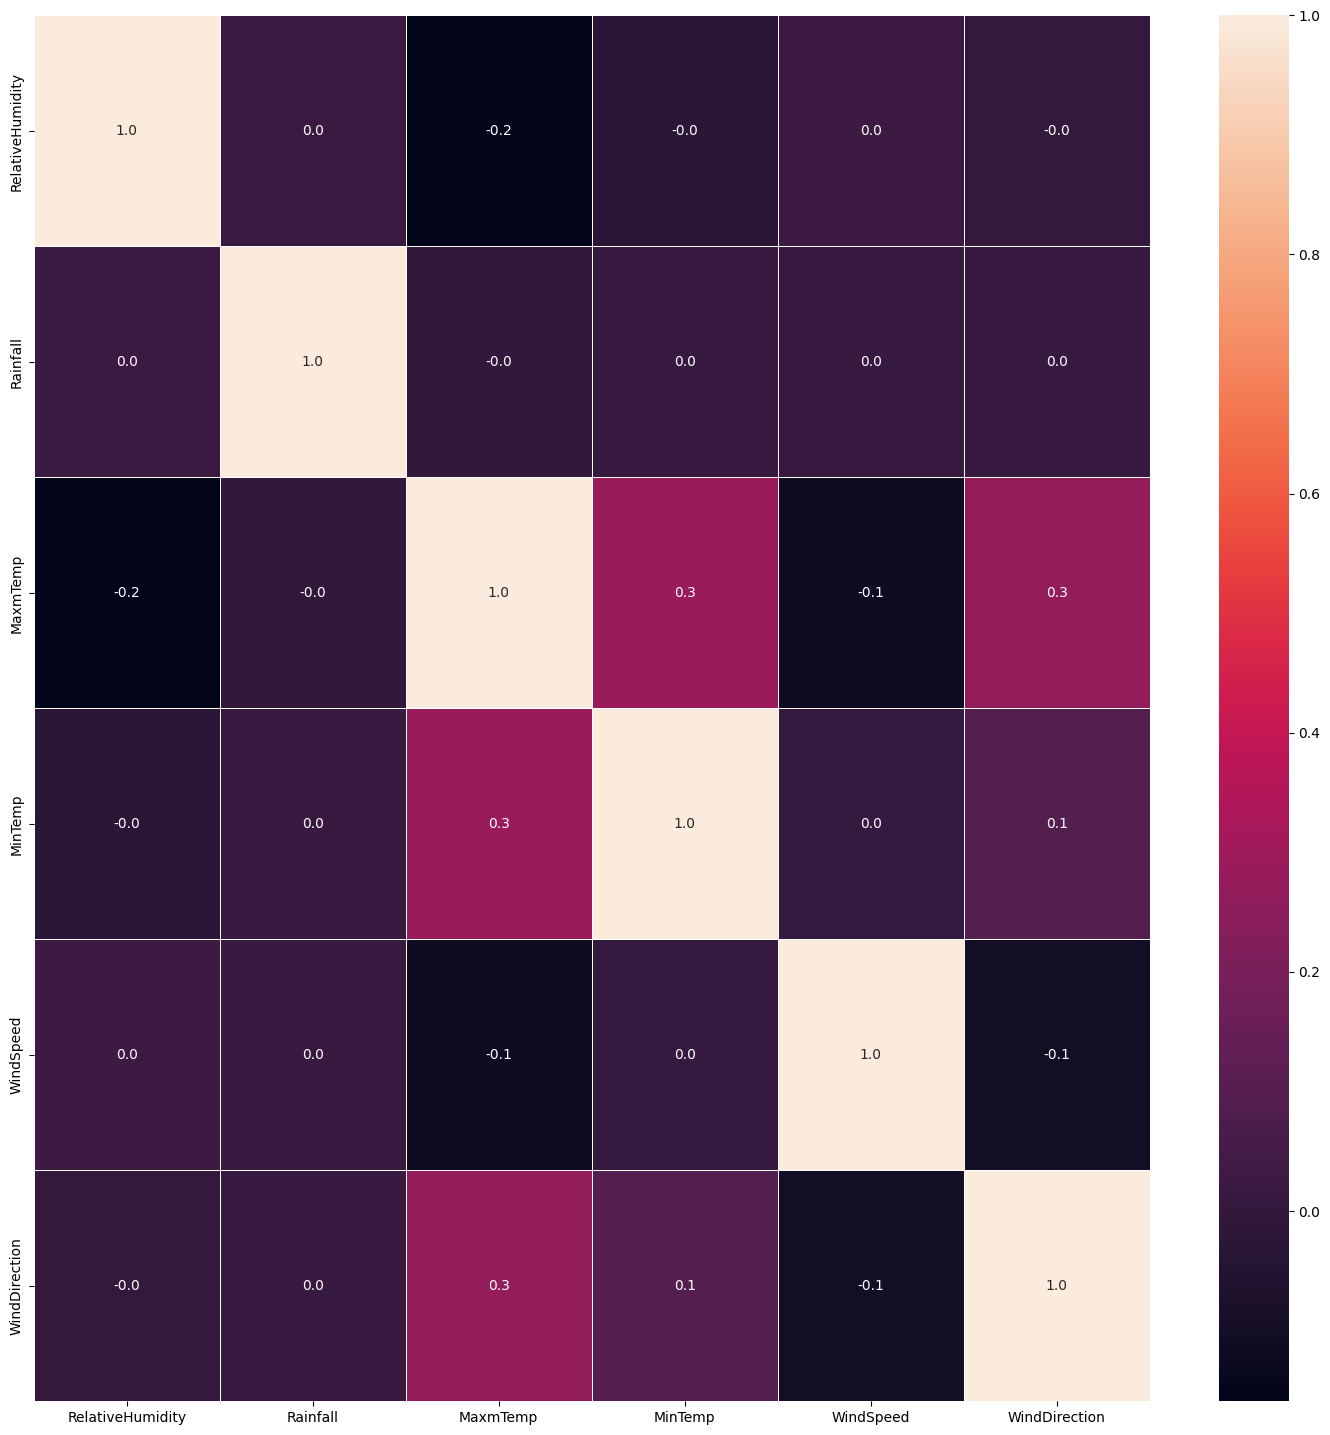

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(combined_x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.savefig('heatmap.png')
plt.show()

In [11]:
quantitative =combined_x.select_dtypes(include = ["int64","float64"]).keys()
combined_x[quantitative].describe()

,RelativeHumidity,Rainfall,MaxmTemp,MinTemp,WindSpeed,WindDirection
count,12025.000000,12025.000000,12025.000000,12025.000000,12025.000000,12025.000000
mean,0.807049,0.028974,0.684851,0.464316,0.151261,0.432721
std,0.128392,0.073191,0.117675,0.139599,0.130719,0.376962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.760000,0.000000,0.605556,0.369048,0.000000,0.000000
50%,0.830000,0.000000,0.694444,0.463415,0.133333,0.444444
75%,0.880000,0.016742,0.776699,0.559524,0.266667,0.805556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'RelativeHumidity'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'MaxmTemp'}>,
        <Axes: title={'center': 'MinTemp'}>],
       [<Axes: title={'center': 'WindSpeed'}>,
        <Axes: title={'center': 'WindDirection'}>]], dtype=object)

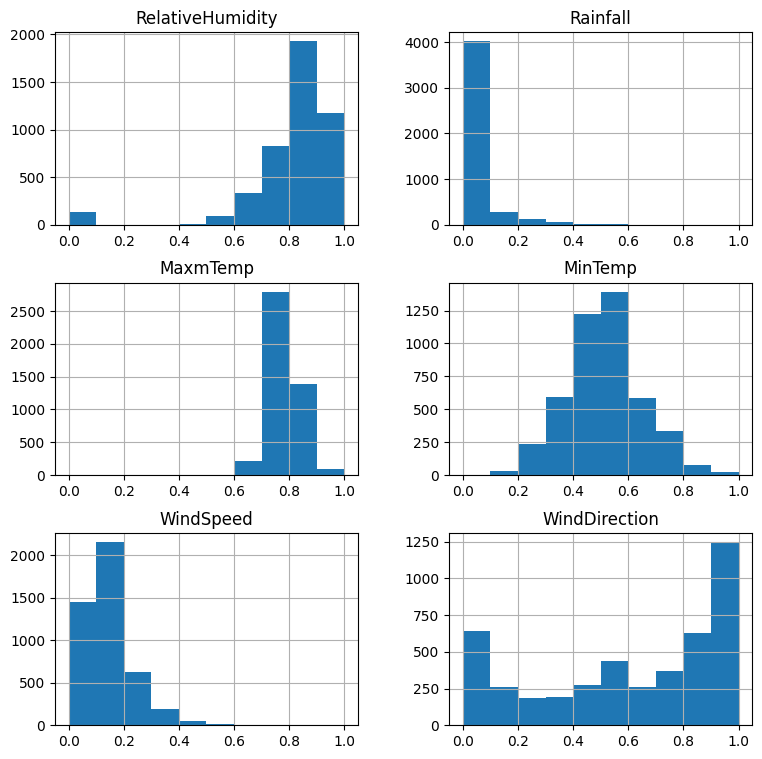

In [12]:
rcParams['figure.figsize'] = 9, 9
EntebbeNormalisedData[quantitative].hist()

In [13]:
# Prepare data for LSTM model
#timesteps = 3764
#timesteps = 3597
timesteps = 1
X_new = []
y_new = []
for i in range(timesteps, len(Xe)):
    X_new.append(Xe[i-timesteps:i])
    y_new.append(Ye[i])
for i in range(timesteps, len(Xk)):
    X_new.append(Xk[i-timesteps:i])
    y_new.append(Yk[i])
for i in range(timesteps, len(Xm)):
    X_new.append(Xm[i-timesteps:i])
    y_new.append(Ym[i])

X_new, y_new = np.array(X_new), np.array(y_new)

# Split data into training and testing sets
train_size = int(len(X_new) * 0.8)

test_size = int(len(X_new) * 0.2)


#train_sizey = int(len(y_new) * 0.8)
#test_sizey = int(len(y_new) * 0.2)


X_train, X_test = X_new[:train_size], X_new[train_size:]
y_train, y_test = y_new[:train_size], y_new[train_size:]

# Reshaping features
X_train = X_train.reshape(9617, 5, 1)  # Assuming 5 features per time step
X_test = X_test.reshape(2405, 5, 1)    # Assuming 5 features per time step

# Reshaping targets
y_train = y_train.reshape(9617, 1)
y_test = y_test.reshape(2405, 1)

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
#y_train = np.reshape(y_train, (y_train.shape[0] ,1))
#y_test = np.reshape(y_test, (y_test.shape[0],1))
#data = data.reshape(1, 10, 2)

In [14]:
X_test.shape

(2405, 5, 1)

In [15]:
#y_pred[0:50]

In [18]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='sigmoid', input_shape=(5, 1)))
model.add(Dense(units=1, activation='sigmoid'))
optimizer = tf.keras.optimizers.legacy.Nadam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
tf.compat.v1.disable_eager_execution()
history = model.fit(X_train, y_train, epochs=1500, batch_size=256, validation_data=(X_test, y_test))

model.save("model99/model.h5")  # Save the entire model
import pickle
with open("model99/training_history.pkl", "wb") as file:
    pickle.dump(history.history, file)
with open("model99/evaluation_results.txt", "w") as file:
    file.write(f"loss: {loss}\n")
    file.write(f"accuracy: {accuracy}\n")
    file.write(f"val_loss: {val_loss}\n")
    file.write(f"val_accuracy: {val_accuracy}\n")
predictions = model.predict(test_data)
np.save("model99/predictions.npy", predictions)

with open("model99/model_config.json", "w") as file:
    file.write(model.to_json())

Train on 9617 samples, validate on 2405 samples
Epoch 1/1500


2024-01-15 13:02:32.537781: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-01-15 13:02:32.545785: W tensorflow/c/c_api.cc:304] Operation '{name:'training/Nadam/lstm_1/lstm_cell/bias/v/Assign' id:590 op device:{requested: '', assigned: ''} def:{{{node training/Nadam/lstm_1/lstm_cell/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Nadam/lstm_1/lstm_cell/bias/v, training/Nadam/lstm_1/lstm_cell/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


9617/9617 [==============================] - 2s 176us/sample - loss: 0.6569 - accuracy: 0.6391 - val_loss: 0.6257 - val_accuracy: 0.6923
Epoch 2/1500
 256/9617 [..............................] - ETA: 0s - loss: 0.6814 - accuracy: 0.5859

/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2024-01-15 13:02:34.104993: W tensorflow/c/c_api.cc:304] Operation '{name:'loss/mul' id:338 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_1_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


9617/9617 [==============================] - 1s 81us/sample - loss: 0.6551 - accuracy: 0.6391 - val_loss: 0.6259 - val_accuracy: 0.6923
Epoch 3/1500
9617/9617 [==============================] - 1s 76us/sample - loss: 0.6537 - accuracy: 0.6391 - val_loss: 0.6377 - val_accuracy: 0.6923
Epoch 4/1500
9617/9617 [==============================] - 1s 81us/sample - loss: 0.6534 - accuracy: 0.6391 - val_loss: 0.6379 - val_accuracy: 0.6923
Epoch 5/1500
9617/9617 [==============================] - 1s 78us/sample - loss: 0.6532 - accuracy: 0.6391 - val_loss: 0.6204 - val_accuracy: 0.6923
Epoch 6/1500
9617/9617 [==============================] - 1s 82us/sample - loss: 0.6531 - accuracy: 0.6391 - val_loss: 0.6368 - val_accuracy: 0.6923
Epoch 7/1500
9617/9617 [==============================] - 1s 82us/sample - loss: 0.6535 - accuracy: 0.6391 - val_loss: 0.6199 - val_accuracy: 0.6923
Epoch 8/1500
9617/9617 [==============================] - 1s 84us/sample - loss: 0.6532 - accuracy: 0.6391 - val_loss: 

/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NameError: name 'loss' is not defined

In [ ]:
# the baseline for the modal is set at epochs =100 and batch size = 64
#history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)

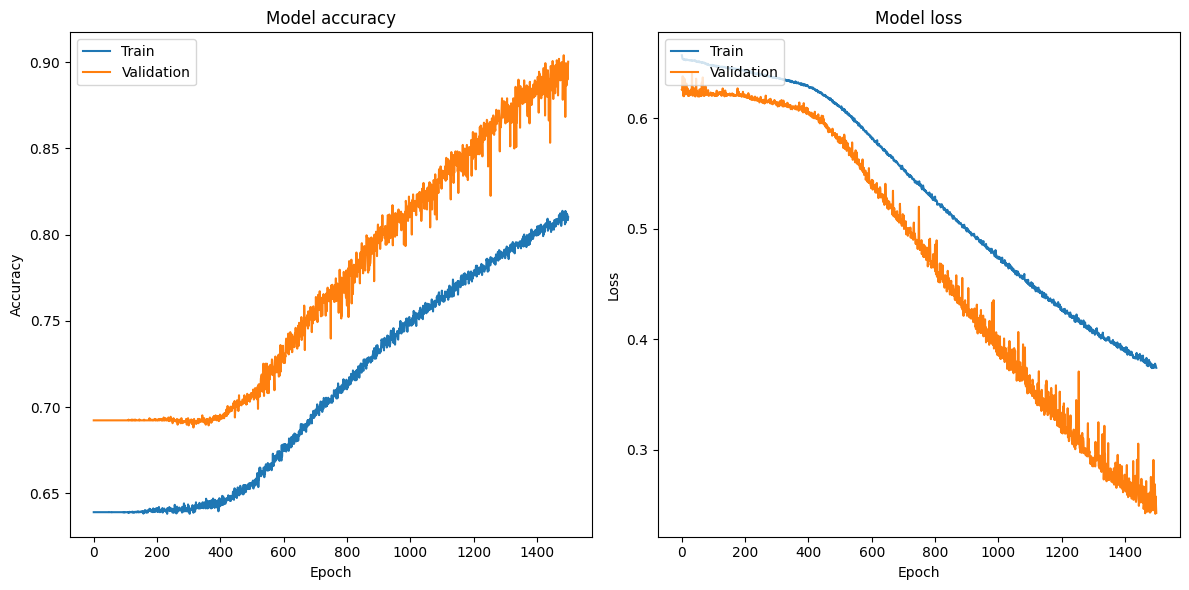

In [20]:
# Plot training and validation curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('model99/modal_accuracy999.png')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('model99/validation_lossNew999.png')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import precision_recall_curve, f1_score
def predictions(X_test,y_test):
    # Predict probabilities for the positive class
    y_pred_proba = model.predict(X_test)
    # Flatten the true labels and predicted probabilities
    y_true = np.ravel(y_test)
    y_scores = np.ravel(y_pred_proba)
    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    # Compute area under the curve (AUC) for precision-recall curve
    pr_auc = auc(recall, precision)
    # Compute average precision score
    average_precision = average_precision_score(y_true, y_scores)
    return y_scores,precision,recall,average_precision, y_true
# Calculate F1 SCORES
def calculateF1score(y_test,y_pred_proba):
    # Generate precision-recall curve data
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    # Calculate F1 score for each threshold
    f1_scores = [f1_score(y_test, y_pred_proba >= threshold) for threshold in thresholds]
    return f1_scores,thresholds

/home/jovyan/.local/lib/python3.8/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-01-15 13:22:45.226097: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_1/Sigmoid' id:281 op device:{requested: '', assigned: ''} def:{{{node dense_1/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


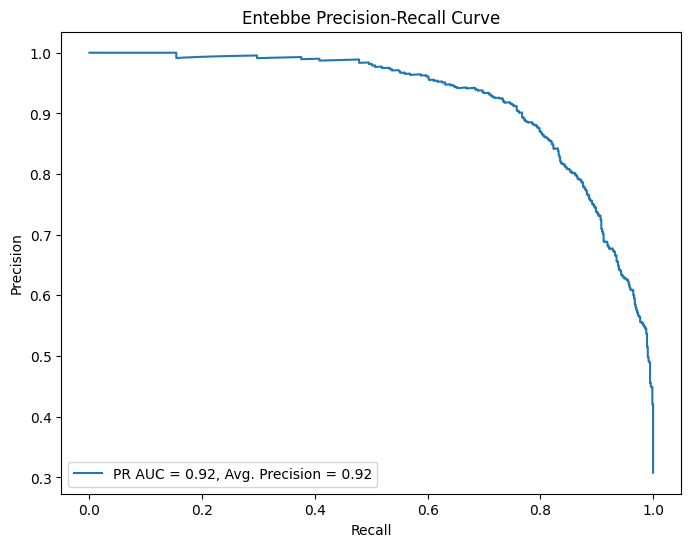

In [22]:
EntebbePredictions = predictions(X_test,y_test)
EntebbeRainfallScore = EntebbePredictions[0]
EntebbePrecision = EntebbePredictions[1]
Entebberecall = EntebbePredictions[2]
EntebbereAveragePrecision = EntebbePredictions[3]

y_true = EntebbePredictions[4]

y_scores = EntebbePredictions[0]

EntebbeF1Calculations = calculateF1score(y_test,EntebbeRainfallScore)
EntebbeF1score = EntebbeF1Calculations[0]
EntebbeThresholds = EntebbeF1Calculations[1]

pr_auc = auc(Entebberecall,EntebbePrecision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(Entebberecall, EntebbePrecision, label=f'PR AUC = {pr_auc:.2f}, Avg. Precision = {EntebbereAveragePrecision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Entebbe Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig('model99/precisionNew.png')
plt.show()

In [ ]:
EntebbeRainfallScore

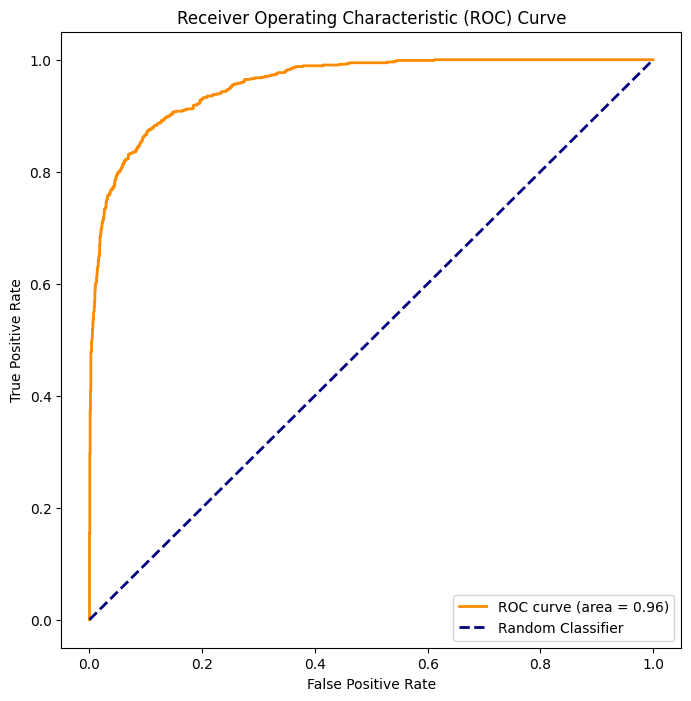

In [23]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,EntebbeRainfallScore)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('model99/ROC.png')
plt.show()

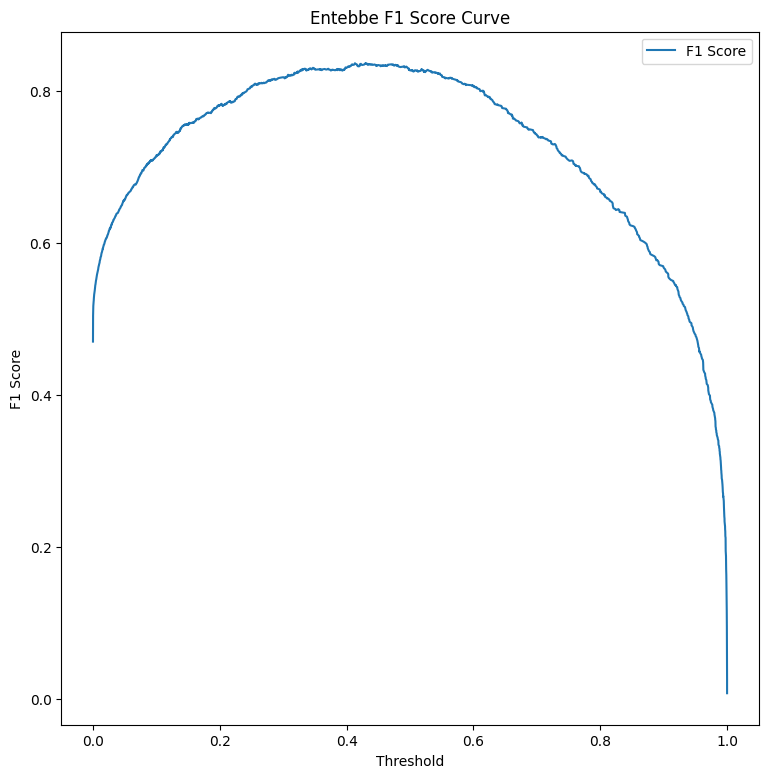

In [24]:
#PLot F1 Score graphs
# Plotting the F1 score curve
plt.plot(EntebbeThresholds,EntebbeF1score, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('Entebbe F1 Score Curve')
plt.legend()
plt.savefig('model99/F1SCORENew.png')
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix
# Make predictions on the test set
y_pred = (EntebbeRainfallScore >= 0.45).astype(int)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1571   94]
 [ 143  597]]


In [56]:
import math

TP = 1571
FP = 94
FN = 143
TN = 597

# Calculating metrics
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)
mcc = (TP * TN - FP * FN) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"MCC: {mcc:.4f}")


Accuracy: 0.9015
Precision: 0.9435
Recall: 0.9166
Specificity: 0.8640
F1 Score: 0.9299
MCC: 0.7653


In [ ]:
y_test[0:10]

In [26]:
# Apply square root transformation
y_scores1 = np.sqrt(EntebbeRainfallScore)
y_test1 = np.sqrt(y_test)
y_test1[0:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [27]:
# Apply sinusoidal transformation
X = np.linspace(0,50,2405)
y_scores1 = EntebbeRainfallScore + 5 * np.sin(X)  # You can adjust the amplitude and frequency as needed
y_test1 = y_test1 + 5 * np.sin(X)  # You can adjust the amplitude and frequency as needed
y_test2 = []
for i in range(len(y_test1)):
    y_test2.append(y_test1[i-1][i])
len(y_test2)

2405

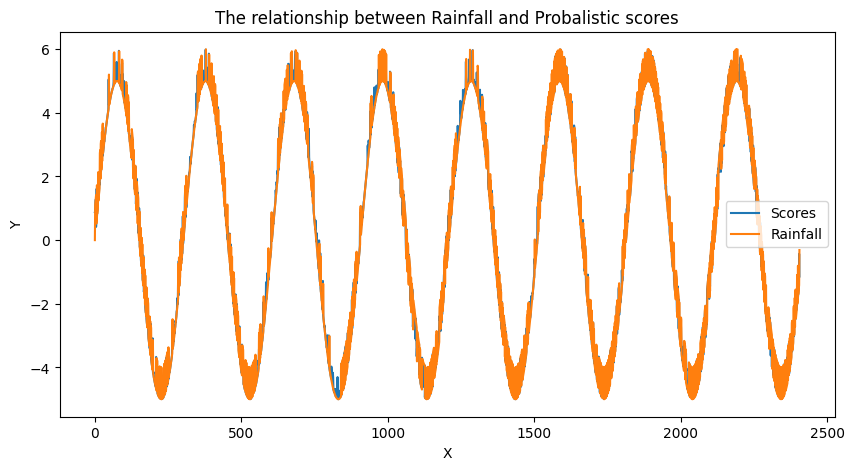

In [28]:
X = np.linspace(0,2405,2405)
#X = np.linspace(0,50,50)
y_scores1 = y_scores1[0:2405]
y_test2 = y_test2[0:2405]

# Plot the original and transformed data
plt.figure(figsize=(10, 5))
plt.plot(X,y_scores1, label='Scores')
plt.plot(X, y_test2, label='Rainfall')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The relationship between Rainfall and Probalistic scores')
plt.savefig('model99/RainScores.png')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (2355,) and (2396,)

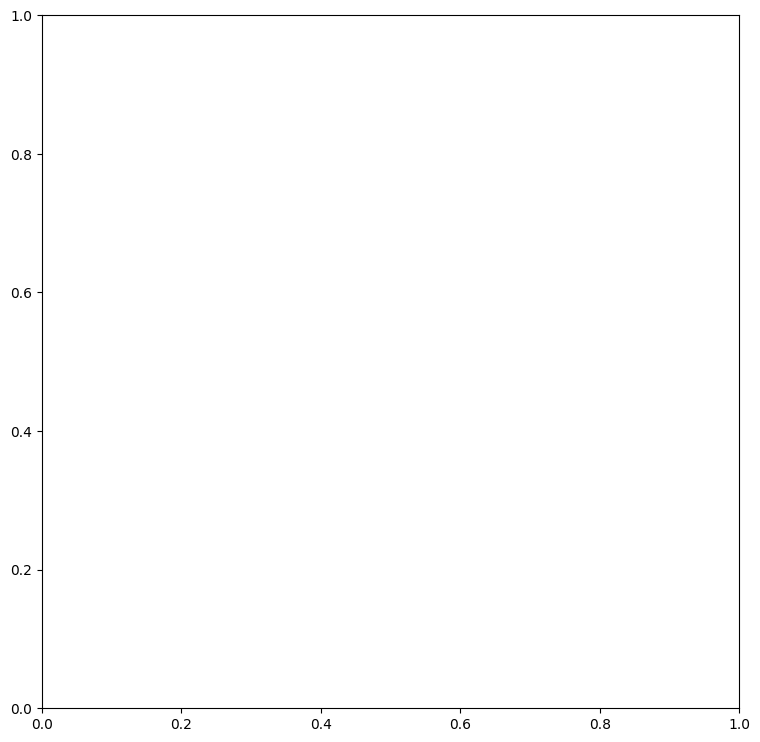

In [29]:
# Plotting precision, recall, and F1 score on the same graph
thresholds2 = np.linspace(0, 1,2355)
plt.plot(thresholds2,EntebbePrecision, label='Precision', marker='o')
plt.plot(thresholds2,Entebberecall, label='Recall', marker='o')
plt.plot(thresholds2,EntebbeF1score, label='F1 Score', marker='o')

# Adding labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score')
plt.legend()
# Display the plot
plt.savefig('model99/FRP.png')
plt.show()

In [ ]:
# Model Classifier 

def modelClassifier (y_true,y_scores,num):
    # Set the decision threshold (you can adjust this as needed)
    decision_threshold = num
    # Create y_pred based on the decision threshold
    y_pred = [1 if score >= decision_threshold else 0 for score in y_scores]
    # Separate points based on y_true and y_pred
    class_0_x = [score for i, score in enumerate(y_scores) if y_true[i] == 0 and y_pred[i] == 0]
    class_0_y = [score for i, score in enumerate(y_scores) if y_true[i] == 0 and y_pred[i] == 0]

    class_1_x = [score for i, score in enumerate(y_scores) if y_true[i] == 1 and y_pred[i] == 1]
    class_1_y = [score for i, score in enumerate(y_scores) if y_true[i] == 1 and y_pred[i] == 1]

    # Plot the points
    plt.scatter(class_0_x, class_0_y, label='Class 0', color='blue')
    plt.scatter(class_1_x, class_1_y, label='Class 1', color='red')

    # Plot the decision threshold line
    plt.axvline(x=decision_threshold, color='black', linestyle='--', label='Decision Threshold')

    # Label the axes and add a legend
    plt.xlabel('y_scores')
    plt.ylabel('y_scores')
    plt.legend()
    plt.savefig('model99/CLASSIFIERNEW.png')
    # Show the plot
    plt.show()
modelClassifier(y_test,EntebbeRainfallScore,0.7)

In [ ]:
def make_predictions(y_scores, threshold=0.7):
    predictions = [1 if score >= threshold else 0 for score in y_scores]
    return predictions
decision_threshold =0.7
# Make predictions using the threshold
y_pred_proba1 = make_predictions(EntebbeRainfallScore, threshold=decision_threshold)

# Predict probabilities for the positive class
#y_pred_proba = model.predict(X_test)

# Flatten the true labels and predicted probabilities
y_true1 = np.ravel(EntebbeRainfallScore)
y_scores1 = np.ravel(y_pred_proba1)

# Compute precision-recall curve
#precision1, recall1, _ = precision_recall_curve(y_true1, y_scores1)

# Compute area under the curve (AUC) for precision-recall curve
#pr_auc = auc(recall1, precision1)

# Compute average precision score
#average_precision1 = average_precision_score(y_true1, y_scores1)
# Plot the precision-recall curve
#plt.figure(figsize=(8, 6))
#plt.plot(recall1, precision1, label=f'PR AUC = {pr_auc:.2f}, Avg. Precision = {average_precision1:.2f}')
#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.title('Precision-Recall Curve')
#plt.legend(loc='lower left')
#plt.savefig('model99/precisionNEW.png')
#plt.show()
# Display the results
#for i, pred in enumerate(predictions):
    #print(f"Sample {i+1}: Predicted Class - {pred}")
y_scores1[0:50]

class1s = []
classZS = []
for j in range(len(y_scores1)):
    if(y_scores1[j] == 1):
        class1s.append(y_scores1[j])
    else:
         classZS.append(y_scores1[j])

data = np.vstack((classZS[0:458],class1s))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
np.random.seed(42)
num_samples = 100

# Class 0 (Zeros) - randomly distributed around (0, 0)
class_0 = np.random.normal(loc=0, scale=1, size=(num_samples // 2, 2))

# Class 1 (Ones) - randomly distributed around (4, 4)
class_1 = np.random.normal(loc=4, scale=1, size=(num_samples // 2, 2))

# Combine the two classes
data = np.vstack((class_0, class_1))
labels = np.hstack((np.zeros(num_samples // 2), np.ones(num_samples // 2)))

# Scatter plot with different colors for each class
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', marker='o', s=100)
plt.title('Scatter Plot Separating Zeros and Ones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Handle the testing of the prediction model very well 

In [ ]:
timesteps = 1
X_newk = []
y_newk = []
for i in range(timesteps, len(Xk)):
    X_newk.append(Xk[i-timesteps:i])
    y_newk.append(Yk[i])

In [25]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true1, y_scores1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('model99/F1SCORENew.png')
plt.show()

NameError: name 'y_true1' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true1,y_scores1)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('model99/ConfusionMatrixNew.png')
plt.show()

In [ ]:
# Kampala Weather Station 12834

# Wind Direction  9114
idd2 = calculateidd3(0,288)
KampalaWd = StationDataRainfall(kampalaWd,idd2,dayz)
Fkwd = calculateidd3(0,9114)  
#stationGraph (Fkwd,KampalaWd) 

# Windforceidd2 = calculateidd3(0,414) KampalaFC 4216
idd2 = calculateidd3(0,128)
KampalaFC = StationDataRainfall(kampalaFC,idd2,dayz)
Fx3 = calculateidd3(0,4216)  
#stationGraph (Fx3,KampalaFC) 

idd2 = calculateidd3(0,383)
Kampalarainfall = StationDataRainfall(kampala,idd,dayz)
len(Kampalarainfall)
x3 = calculateidd3(0,12834)  
#stationGraph (x2,Kampalarainfall)

# Relative Humidity 21545
iddd = calculateidd3(0,698)
KampalaRH = StationDataRainfall(kampalaRH,iddd,dayz)
xx1 = calculateidd3(0,23529)
#stationGraph (xx1,KampalaRH)

# Temperature Maximum 12028
iddd = calculateidd3(0,350)
KampalaTX = StationDataRainfall(kampalaTx,iddd,dayz)
Kxx1 = calculateidd3(0,12028)
#stationGraph (Kxx1,KampalaTX)

# Temperature Minimum 7595
iddd = calculateidd3(0,219)
KampalaTn = StationDataRainfall(kampalaTn,iddd,dayz)
Kxx2 = calculateidd3(0,7595)
#stationGraph (Kxx2,KampalaTn)
Kampaladata = convertdatabacktodataframe2(KampalaRH,Kampalarainfall,KampalaTX,KampalaTn,KampalaFC,KampalaWd)
#Kampaladata

Kampaladictionary = Kampaladata[1]
Kampaladictionary2 = Kampaladata[0]
Kampaladictionary2.replace('__', pd.NA, inplace=True)
Kampaladictionary2 = Kampaladictionary2.dropna() 

Rainfall =Kampaladictionary['Rainfall']
# Add creating rainfall classes 
KampalaRainfallclasses = Rainfallclasses(Rainfall)
#Entebbedata

# Normalised data
KampalaNormalisedData = NormaliseDatasets(Kampaladictionary2)
#EntebbeNormalisedData = EntebbeNormalisedData.drop(Entebberainfall, axis=1)
# Add the target variable back to the DataFrame
#EntebbeNormalisedData[EntebbeRainfallclasses] = EntebbeNormalisedData[EntebbeRainfallclasses]
#EntebbeNormalisedData
Rainfall = KampalaNormalisedData['Rainfall']
KampalaRainfallclasses = Rainfallclasses(Rainfall)
Xk = KampalaNormalisedData.drop('Rainfall', axis=1)
#Y= EntebbeRainfallclasses
Yk= Rainfall
Xk.shape

In [ ]:
quantitative =KampalaNormalisedData.select_dtypes(include = ["int64","float64"]).keys()
KampalaNormalisedData[quantitative].describe()

In [ ]:
# Prepare data for LSTM model
#timesteps = 3764
#timesteps = 3597
timesteps = 1
X_new1 = []
y_new1 = []
for i in range(timesteps, len(Xk)):
    X_new1.append(Xk[i-timesteps:i])
    y_new1.append(Yk[i])

X_new1, y_new1 = np.array(X_new1), np.array(y_new1)   

# Split data into training and testing sets
train_size = int(len(X_new1) * 0)

test_size = int(len(X_new1) * 1)


#train_sizey = int(len(y_new) * 0.8)
#test_sizey = int(len(y_new) * 0.2)

X_train1, X_test1 = X_new1[:train_size], X_new1[train_size:]
y_train1, y_test1 = y_new1[:train_size], y_new1[train_size:]

# Reshaping features
#X_train = X_train.reshape(3764, 5, 1)  # Assuming 5 features per time step
X_test1 = X_test1.reshape(3763, 5, 1)    # Assuming 5 features per time step

# Reshaping targets
#y_train = y_train.reshape(3763, 1)
y_test1 = y_test1.reshape(3763, 1)

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
#y_train = np.reshape(y_train, (y_train.shape[0] ,1))
#y_test = np.reshape(y_test, (y_test.shape[0],1))
#data = data.reshape(1, 10, 2)

In [ ]:
len(X_test1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
# Disable GPU
#tf.config.experimental.list_physical_devices('GPU')

# Replace 'model.h5' with the path to your HDF5 file
model_path = 'model99/model.h5'

# Load the model
loaded_model = load_model(model_path)

# Assuming you have new data for prediction (replace this with your actual data)
#new_data = np.array([[...], [...], ...])  # Replace with your input data

# Make predictions
predictions = loaded_model.predict(X_test1)
y_scores2 = np.ravel(predictions)
    # Compute precision-recall curve
#precision, recall, _ = precision_recall_curve(y_test1,predictions)

# Print or use the predictions as needed

In [ ]:
# Example values, replace these with your actual values
X = np.linspace(0, 3763,3763)
# Flatten the true labels and predicted probabilities
y_true11 = np.ravel(y_test1)
y_predict1 = np.ravel(X_test1)

# Plotting precision, recall, and F1 score on the same graph
plt.plot(X,y_true11, label='Ground Truth', marker='o')
plt.plot(X,y_predict1, label='Prediction', marker='o')

# Adding labels and legend
plt.xlabel('Numbers')
plt.ylabel('Scores')
plt.title('Precipitation prediction')
plt.legend()
plt.savefig('modelFinal2/precipitation.png')
# Display the plot
plt.show()

In [ ]:
#PLot F1 Score graphs
# Plotting the F1 score curve
plt.plot(KampalaThresholds,KampalaF1score, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('Entebbe F1 Score Curve')
plt.legend()
plt.savefig('model99/F1SCORE9Kampala.png')
plt.show()

In [ ]:
KampalaPredictions = predictions(X_test1,y_test1)
KampalaRainfallScore = KampalaPredictions[0]
KampalaPrecision = KampalaPredictions[1]
Kampalarecall = KampalaPredictions[2]
KampalareAveragePrecision = KampalaPredictions[3]

KampalaF1Calculations = calculateF1score(y1_test,KampalaRainfallScore)
KampalaF1score = KampalaF1Calculations[0]
KampalaThresholds = KampalaF1Calculations[1]

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(Kampalarecall,KampalaPrecision, label=f'PR AUC = {pr_auc:.2f}, Avg. Precision = {KampalareAveragePrecision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kampala Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig('modelFinal2/precisionKampalaNew1.png')
plt.show()

In [ ]:
# Make predictions using the threshold
y_pred_proba1 = make_predictions(KampalaRainfallScore, threshold=0.52)

# Predict probabilities for the positive class
#y_pred_proba = model.predict(X1_test)

# Flatten the true labels and predicted probabilities
y_trueK = np.ravel(y1_test)
y_scoresK = np.ravel(y_pred_proba1)

# Compute precision-recall curve
precision1, recall1, _ = precision_recall_curve(y_true1, y_scores1)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall1, precision1)

# Compute average precision score
average_precision1 = average_precision_score(y_true1, y_scores1)
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall1, precision1, label=f'PR AUC = {pr_auc:.2f}, Avg. Precision = {average_precision1:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig('model99/precision99Ka2.png')
plt.show()
# Display the results
#for i, pred in enumerate(predictions):
    #print(f"Sample {i+1}: P

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_trueK, KampalaRainfallScore)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('model99/NEWROC.png')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_trueK,y_scoresK)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('model99/ConfusionMatrix1Kampala1.png')
plt.show()

In [ ]:
# Make predictions using the threshold
y_pred_proba1 = make_predictions(KampalaRainfallScore, threshold=0.46)

# Predict probabilities for the positive class
#y_pred_proba = model.predict(X1_test)

# Flatten the true labels and predicted probabilities
y_trueK = np.ravel(y1_test)
y_scoresK = np.ravel(y_pred_proba1)

# Compute precision-recall curve
precision1, recall1, _ = precision_recall_curve(y_true1, y_scores1)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall1, precision1)

# Compute average precision score
average_precision1 = average_precision_score(y_true1, y_scores1)
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall1, precision1, label=f'PR AUC = {pr_auc:.2f}, Avg. Precision = {average_precision1:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.savefig('modelFinal2/precision99Ka5.png')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Replace 'model.h5' with the path to your HDF5 file
model_path = 'model99/model.h5'

# Load the model
loaded_model = load_model(model_path)

# Assuming you have new data for prediction (replace this with your actual data)
#new_data = np.array([[...], [...], ...])  # Replace with your input data

# Make predictions
predictions = loaded_model.predict(X1_test11)
y_scores2 = np.ravel(predictions)
    # Compute precision-recall curve
#precision, recall, _ = precision_recall_curve(y_true, y_scores)

# Print or use the predictions as needed
print("Predictions:")

In [ ]:
y_scores2

In [ ]:
# Example values, replace these with your actual values
X = np.linspace(0, 1, 7)
Threshold = [0.481,0.482,0.48,0.46,0.44,0.42,0.40]
PR_AUC = [0.62,0.59,0.65,0.75,0.75,0.75,0.75]
AVG_PREC = [0.53,0.52,0.55,0.5,0.5,0.5,0.5]

# Plotting precision, recall, and F1 score on the same graph
plt.plot(X,Threshold, label='Threshold', marker='o')
plt.plot(X,PR_AUC, label='PR AUC', marker='o')
plt.plot(X, AVG_PREC, label='AVG PREC', marker='o')

# Adding labels and legend
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold, Area under PR AUC, and Average Precision')
plt.legend()
plt.savefig('modelFinal2/selectThresholds.png')
# Display the plot
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
station_data = {
    'Station': ['Sample Station'],
    'Latitude': [0.0512],
    'Longitude': [32.4637],
    'Temperature': [25],  # Replace with actual temperature
    'Rainfall': [10]      # Replace with actual rainfall
}

# Create a GeoDataFrame with the station data
geometry = gpd.points_from_xy(station_data['Longitude'], station_data['Latitude'])
station_gdf = gpd.GeoDataFrame(station_data, geometry=geometry)

# Load a world map for background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


uganda = world[world['name'] == 'Uganda']

# Plot the world map
ax = uganda.plot(figsize=(10, 6), color='lightgrey')

# Plot the station on the map
station_gdf.plot(ax=ax, color='red', marker='o', markersize=100)

# Annotate with temperature and rainfall information
ax.annotate(f'Temperature: {station_data["Temperature"]}°C\nRainfall: {station_data["Rainfall"]} mm',
            xy=(station_data['Longitude'][0], station_data['Latitude'][0]),
            xytext=(station_data['Longitude'][0] + 10, station_data['Latitude'][0] + 10))

# Show the plot
plt.title('Temperature and Rainfall for Sample Station')
plt.show()

In [ ]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Hypothetical temperature data for each country
temperature_data = {
    'name': ['Enetebbe', 'Kampala', 'MAsindi'],  # Add more countries as needed
    'temperature': [25.3, 22.1, 30.5]  # Corresponding temperature values
}

# Create a DataFrame for temperature data
temperature_df = pd.DataFrame(temperature_data)

# Merge the world GeoDataFrame with the temperature data
world_with_temp = world.merge(temperature_df, how='left', on='name')

# Plot the map with temperature data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world_with_temp.plot(column='temperature', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title and legend label
plt.title('Temperature Map')
ax.set_axis_off()
plt.show()

In [ ]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the GeoDataFrame for Uganda
uganda = world[world['name'] == 'Uganda']

# Plot the map for Uganda
uganda.plot()
plt.title('Uganda')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

y = y_pred_proba1

# Predict probabilities for the positive class
# Reshape or flatten the 3D array to a 2D array

X = X1_test

X_flattened = X.reshape((X.shape[0], -1))

# Assume 'X' is your feature matrix, and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Create and train a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


In [ ]:
len(X)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
#plt.savefig('ConfusionMatrix1Kampala1.png')
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

uganda = world[world['name'] == 'Uganda']

# Hypothetical station data
station_data = {
    'station_name': ['Entebbe', 'Kampala', 'Masindi', 'Kawanda','Namulonge'],
    'latitude': [0.0512, 0.3152, 1.6873, 0.4223,0.5333],  # Adjust with actual latitude values
    'longitude': [32.4637, 32.5816, 31.7138, 32.5415,32.6167],  # Adjust with actual longitude values
    'temperature': [28.5, 22.8, 30.2, 25.5,26.5],  # Adjust with actual temperature values
    'rainfall': [50.5, 25.3, 10.0, 25.5,15]  # Adjust with actual rainfall values
}

# Create a GeoDataFrame for station data
station_gdf = gpd.GeoDataFrame(station_data, geometry=gpd.points_from_xy(station_data['longitude'], station_data['latitude']))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Set the facecolor to None (transparent background)
ax.set_facecolor('None')

uganda.plot(ax=ax, color='white', edgecolor='0.0', linewidth=0.8)

# Plot station locations with names and additional information
station_gdf.plot(ax=ax, color='red', marker='o', markersize=100)

for x, y, label, temp, rainfall in zip(station_gdf.geometry.x, station_gdf.geometry.y, station_gdf['station_name'], station_gdf['temperature'], station_gdf['rainfall']):
    annotation_text = f'{label} {temp}°C {rainfall} mm'
    ax.annotate(annotation_text, (x, y), xytext=(x + 5, y + 5), fontsize=8,
                textcoords='offset points', ha='right', va='bottom')

# Set plot title
plt.title('Map of Uganda with Selected Stations')

# Remove axis
ax.set_axis_off()

# Save the plot
plt.savefig('modelFinal2/MapOfUganda.png')

# Show the plot
plt.show()
